In [16]:
import colour
import numpy as np
from colour.plotting import plot_multi_colour_checkers

from colour_checker_detection import (
    colour_checkers_coordinates_segmentation,
    detect_colour_checkers_segmentation)

from colour_checker_detection.detection.segmentation import (
    adjust_image)

from collections import OrderedDict

# copyright from http://www.brucelindbloom.com/index.html?Eqn_RGB_XYZ_Matrix.html 
# for sRGB
matrix_XYZ_to_RGB = np.array(
    [[3.24062548, -1.53720797, -0.49862860],
     [-0.96893071, 1.87575606, 0.04151752],
     [0.05571012, -0.20402105, 1.05699594]]
)
matrix_RGB_to_XYZ = np.array(
    [[ 0.4124564, 0.3575761, 0.1804375],
     [0.2126729, 0.7151522, 0.0721750],
     [0.0193339, 0.1191920, 0.9503041]])
#################################################################################

def color_correct(image, ref_color_checker, plot=False, method='Cheung 2004', **kwargs):
    assert method in {'Finlayson 2015', 'Cheung 2004', 'Vandermonde'}

    # Find the color checker swatches
    swatches = detect_colour_checkers_segmentation(image)[0][::-1]

    # define D65 as the standard illuminant we will use
    D65 = colour.CCS_ILLUMINANTS['CIE 1931 2 Degree Standard Observer']['D65']

    # convert the reference color checker to RGB, by going through XYZ and using the D65 illuminant
    ref_color_checker_RGB = colour.XYZ_to_RGB(
        colour.xyY_to_XYZ(list(ref_color_checker.data.values())),
        ref_color_checker.illuminant, D65,
        matrix_XYZ_to_RGB)

    # plot the color checkers overlapped with the colors extracted from the image
    if plot:
        # convert the uncorrected swatches extracted from the image from RGB to xyY by going through XYZ
        swatches_xyY = colour.XYZ_to_xyY(
            colour.RGB_to_XYZ(
                swatches, D65, D65,
                   matrix_RGB_to_XYZ))

        # use the RGB reference color checker to correct just the color checker swatches from the image
        swatches_corrected = colour.colour_correction(
            swatches, swatches, ref_color_checker_RGB, method=method, **kwargs)

        # convert these color corrected swatches from RGB to xyY by going through XYZ
        swatches_corrected_xyY = colour.XYZ_to_xyY(
            colour.RGB_to_XYZ(
                swatches_corrected, D65, D65,
                matrix_RGB_to_XYZ))

        image_colour_checker = colour.characterisation.ColourChecker(
            'Uncorrected Image',
            OrderedDict(zip(ref_color_checker.data.keys(),
                            swatches_xyY)),
            D65)
        image_colour_checker_corrected = colour.characterisation.ColourChecker(
            'Corrected Image with {:}'.format(method),
            OrderedDict(zip(ref_color_checker.data.keys(),
                            swatches_corrected_xyY)),
            D65)

        plot_multi_colour_checkers(
            [ref_color_checker, image_colour_checker])

        plot_multi_colour_checkers(
            [ref_color_checker, image_colour_checker_corrected])

    return colour.colour_correction(image, swatches, ref_color_checker_RGB, method=method, **kwargs)


In [17]:
%matplotlib inline
import numpy
import colour
from colour.plotting import plot_image
import SpyderCHECKR24

In [18]:
filename = 'JPG_uncorrected/2.JPG'
image2 = colour.cctf_decoding(colour.io.read_image(filename, method='Imageio'), function='sRGB')

In [19]:
filename = 'JPG_uncorrected/3.JPG'
image3 = colour.cctf_decoding(colour.io.read_image(filename, method='Imageio'), function='sRGB')

In [20]:
filename = 'JPG_uncorrected/5.JPG'
image4 = colour.cctf_decoding(colour.io.read_image(filename, method='Imageio'), function='sRGB')

In [21]:
corrected_image2_1 = numpy.clip(color_correct(
                            image=image2,
                            ref_color_checker=SpyderCHECKR24.colour_checker,
                            method='Finlayson 2015',
                            plot=False, degree=1), # show the extracted color correction charts
                            0.0, 1.0)
corrected_image2_2 = numpy.clip(color_correct(
                            image=image2,
                            ref_color_checker=SpyderCHECKR24.colour_checker,
                            method='Finlayson 2015',
                            plot=False, degree=2), # show the extracted color correction charts
                            0.0, 1.0)
corrected_image2_3 = numpy.clip(color_correct(
                            image=image2,
                            ref_color_checker=SpyderCHECKR24.colour_checker,
                            method='Finlayson 2015',
                            plot=False, degree=3), # show the extracted color correction charts
                            0.0, 1.0)

corrected_image2_4 = numpy.clip(color_correct(
                            image=image2,
                            ref_color_checker=SpyderCHECKR24.colour_checker,
                            method='Finlayson 2015',
                            plot=False, degree=4), # show the extracted color correction charts
                            0.0, 1.0)

In [22]:
# detect_colour_checkers_segmentation(image4)

In [23]:
corrected_image3_1 = numpy.clip(color_correct(
                            image=image3,
                            ref_color_checker=SpyderCHECKR24.colour_checker,
                            method='Finlayson 2015',
                            plot=False, degree=1), # show the extracted color correction charts
                            0.0, 1.0)
corrected_image3_2 = numpy.clip(color_correct(
                            image=image3,
                            ref_color_checker=SpyderCHECKR24.colour_checker,
                            method='Finlayson 2015',
                            plot=False, degree=2), # show the extracted color correction charts
                            0.0, 1.0)
corrected_image3_3 = numpy.clip(color_correct(
                            image=image3,
                            ref_color_checker=SpyderCHECKR24.colour_checker,
                            method='Finlayson 2015',
                            plot=False, degree=3), # show the extracted color correction charts
                            0.0, 1.0)
corrected_image3_4 = numpy.clip(color_correct(
                            image=image3,
                            ref_color_checker=SpyderCHECKR24.colour_checker,
                            method='Finlayson 2015',
                            plot=False, degree=4), # show the extracted color correction charts
                            0.0, 1.0)

In [24]:
corrected_image4_1 = numpy.clip(color_correct(
                            image=image4,
                            ref_color_checker=SpyderCHECKR24.colour_checker,
                            method='Finlayson 2015',
                            plot=False, degree=1), # show the extracted color correction charts
                            0.0, 1.0)
corrected_image4_2 = numpy.clip(color_correct(
                            image=image4,
                            ref_color_checker=SpyderCHECKR24.colour_checker,
                            method='Finlayson 2015',
                            plot=False, degree=2), # show the extracted color correction charts
                            0.0, 1.0)
corrected_image4_3 = numpy.clip(color_correct(
                            image=image4,
                            ref_color_checker=SpyderCHECKR24.colour_checker,
                            method='Finlayson 2015',
                            plot=False, degree=3), # show the extracted color correction charts
                            0.0, 1.0)
corrected_image4_4 = numpy.clip(color_correct(
                            image=image4,
                            ref_color_checker=SpyderCHECKR24.colour_checker,
                            method='Finlayson 2015',
                            plot=False, degree=4), # show the extracted color correction charts
                            0.0, 1.0)

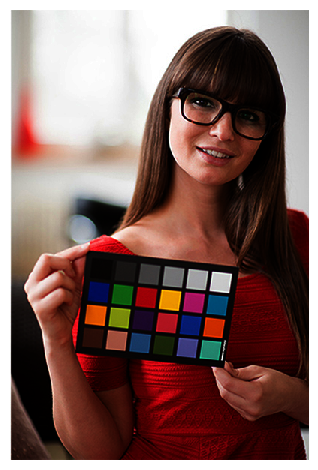

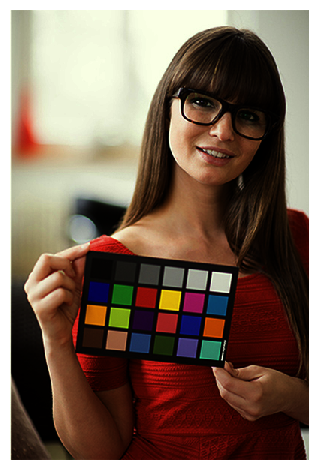

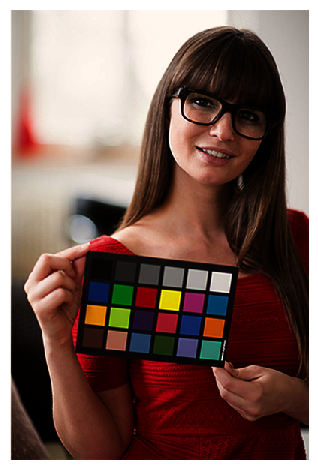

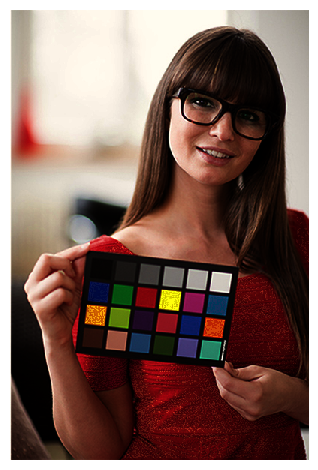

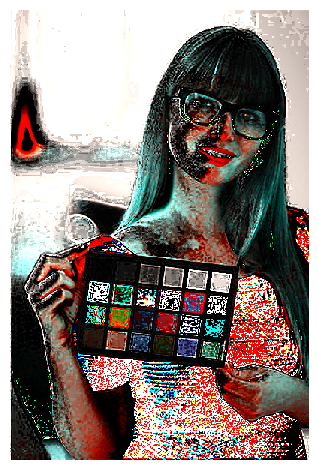

(<Figure size 640x480 with 1 Axes>, <AxesSubplot: >)

In [25]:
plot_image(image2)
plot_image(corrected_image2_1)
plot_image(corrected_image2_2)
plot_image(corrected_image2_3)
plot_image(corrected_image2_4)

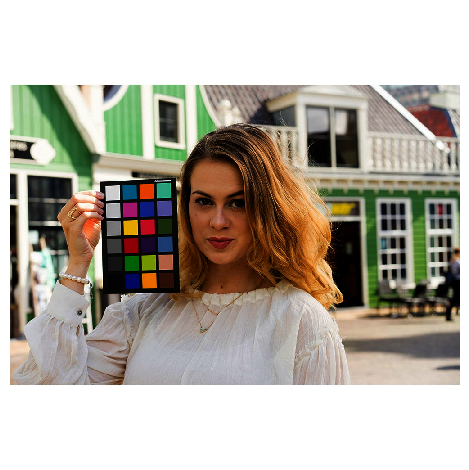

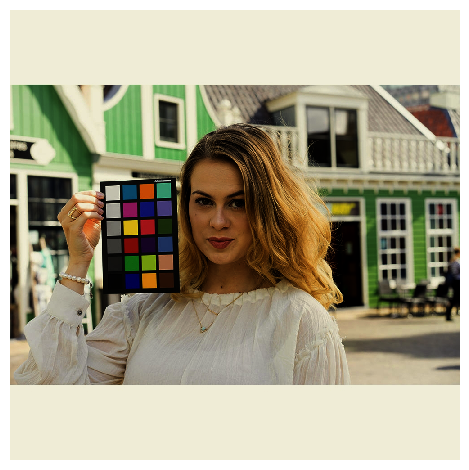

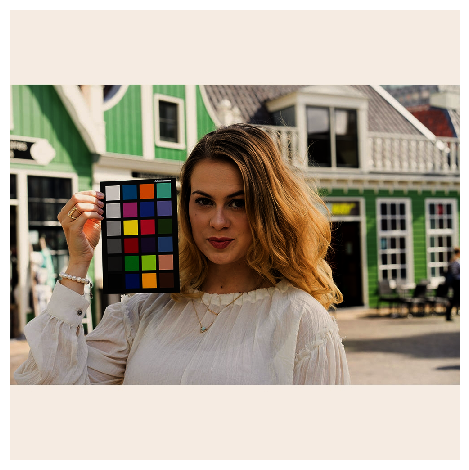

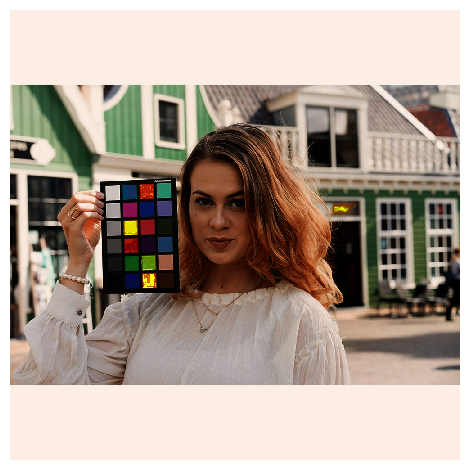

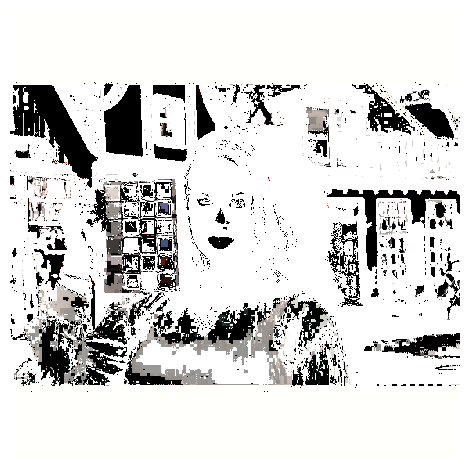

(<Figure size 640x480 with 1 Axes>, <AxesSubplot: >)

In [26]:
plot_image(image3)
plot_image(corrected_image3_1)
plot_image(corrected_image3_2)
plot_image(corrected_image3_3)
plot_image(corrected_image3_4)

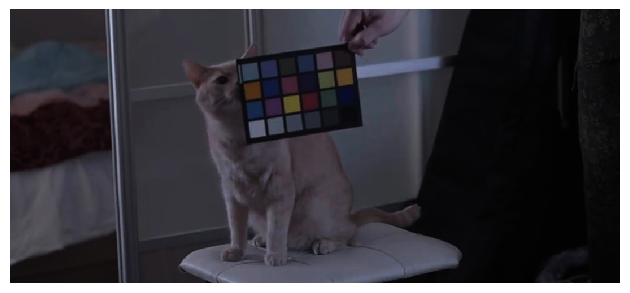

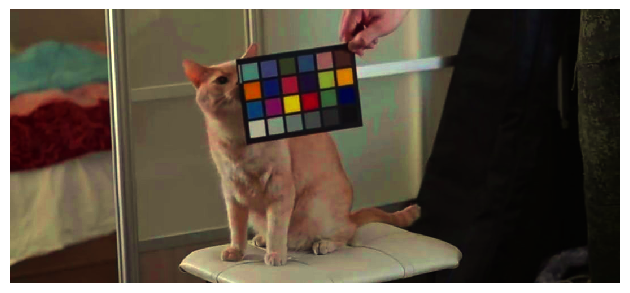

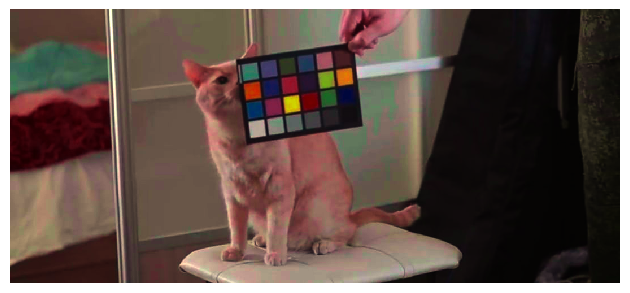

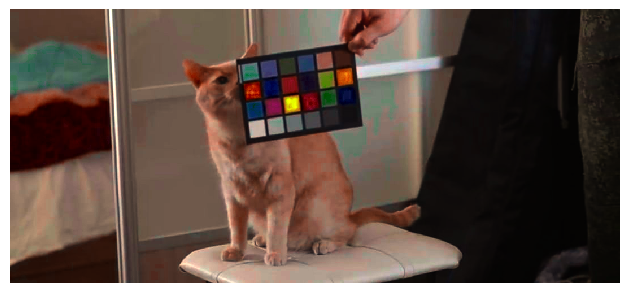

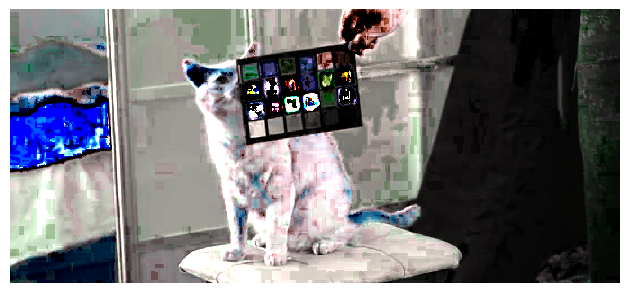

(<Figure size 640x480 with 1 Axes>, <AxesSubplot: >)

In [27]:
plot_image(image4)
plot_image(corrected_image4_1)
plot_image(corrected_image4_2)
plot_image(corrected_image4_3)
plot_image(corrected_image4_4)

# first https://colorimetr.ru/blog/obzory-tovarov/obzor-datacolor-spydercheckr-24/
# second https://www.coloreurope.eu/shop/datacolor-spydercheckr-7612p.html?CookieConsentChanged=1#gallery-4
# third https://youtu.be/EvfNz7uj0wQ